A princípio, o dataset utilizado foi o **EuroSat Dataset**, podendo ser verificado no seguinte link: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

Foram selecionadas um total de 10 imagens **com baixo contraste** que necessitavam de um processamento digital para uma respectiva melhoria a nível visual.

In [18]:
!pip install opencv-python


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [20]:
images = []
image_path = 'C:\\Users\\Caio\\AtividadePDI'

for i in range(1, 11):
    file_path = os.path.join(image_path, f"AnnualCrop_{i}.jpg")
    image = cv2.imread(file_path)
    if image is not None:
        images.append(image)
    else:
        print(f"Failed to load: AnnualCrop_{i}.jpg")

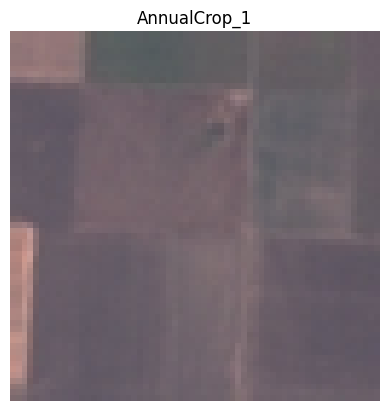

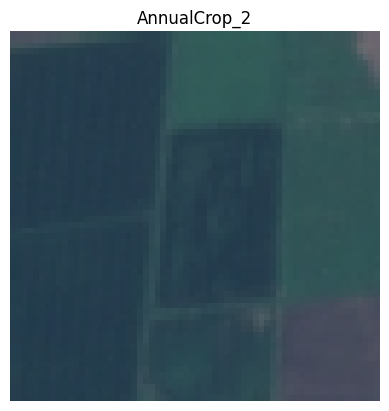

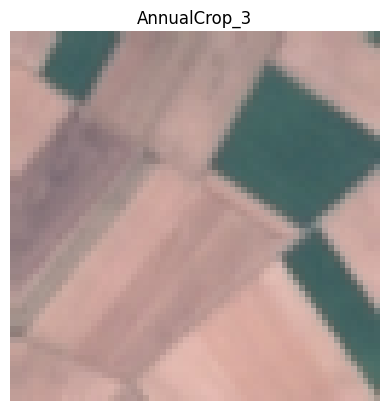

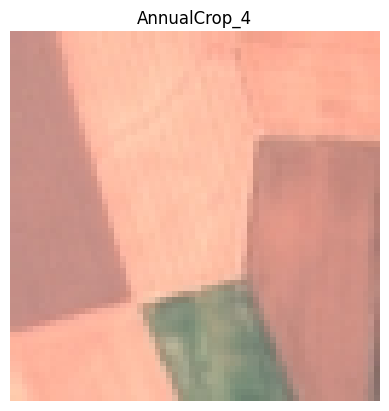

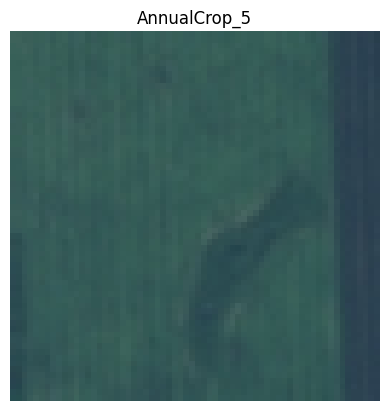

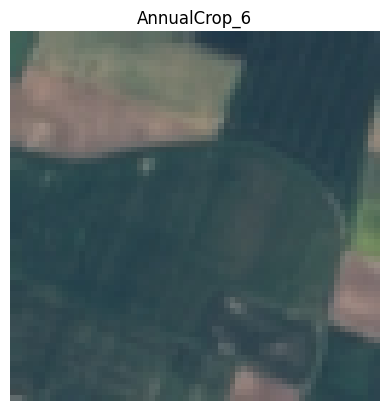

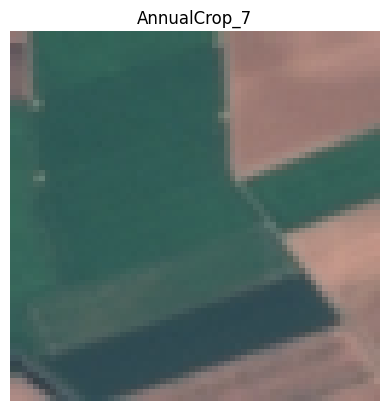

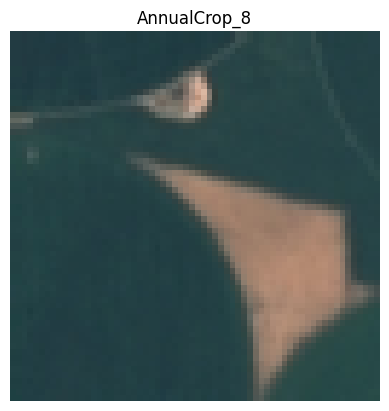

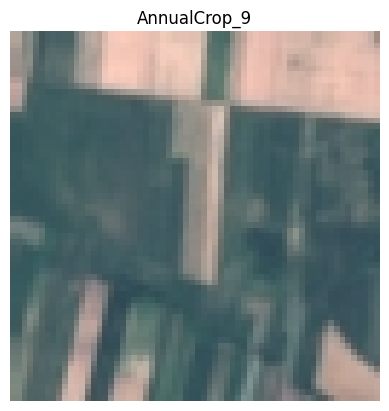

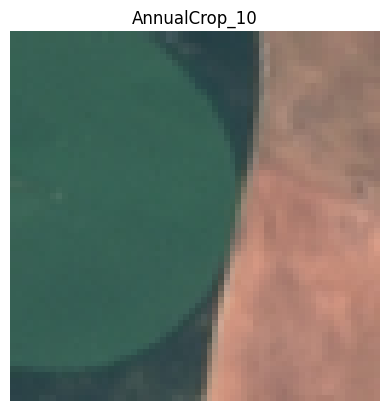

In [21]:
for i, image in enumerate(images):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.imshow(rgb_image)
    plt.title(f"AnnualCrop_{i+1}")
    plt.axis('off')
    plt.show()

Com as imagens devidamente armazenadas, é necessário realizar o que se solicita na atividade:

1. Dada uma imagem de satélite com baixa visibilidade, aplicar equalização de histograma
para realce de contraste;
2. Aplicar especificação de histograma para adequar o estilo tonal de uma imagem a uma
referência (por exemplo, uma imagem capturada em dia ensolarado);
3. Exibir e comparar os histogramas antes e depois do processamento;
4. Aplicar as técnicas apenas em determinadas regiões da imagem, como áreas agrícolas, usando
uma máscara

Para satisfazer o que é proposto no item 1, serão utilizadas as imagens 1, 2 e 3.

Porém, note que as imagens são coloridas, ou seja, é necessário fazer os seguintes procedimentos:
-Transformar as imagens para o espaço de cores HSV.
-Realizar a equalização de histograma apenas no canal V (Valor).
-Transformar as imagens de volta para o espaço de cores RGB.

In [22]:
#Carregar as imagens
img1 = cv2.imread('C:\\Users\\Caio\\AtividadePDI\\AnnualCrop_1.jpg')
img2 = cv2.imread('C:\\Users\\Caio\\AtividadePDI\\AnnualCrop_2.jpg')
img3 = cv2.imread('C:\\Users\\Caio\\AtividadePDI\\AnnualCrop_3.jpg')

In [23]:
# Converter para o espaço de cores HSV
hsv_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
hsv_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
hsv_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)

In [24]:
# Dividir os canais HSV
h1, s1, v1 = cv2.split(hsv_img1)
h2, s2, v2 = cv2.split(hsv_img2)
h3, s3, v3 = cv2.split(hsv_img3)

Agora, é necessário equalizar somente o canal **v**.

In [25]:
# Equalizar o canal V (valor)
v1_equalized = cv2.equalizeHist(v1)
v2_equalized = cv2.equalizeHist(v2)
v3_equalized = cv2.equalizeHist(v3)

In [26]:
# Mesclar os canais HSV de volta, com o canal V equalizado
hsv_img1 = cv2.merge([h1, s1, v1_equalized])
hsv_img2 = cv2.merge([h2, s2, v2_equalized])
hsv_img3 = cv2.merge([h3, s3, v3_equalized])


In [27]:
# Converter de volta para o espaço de cores RGB
img1_equalized = cv2.cvtColor(hsv_img1, cv2.COLOR_HSV2RGB)
img2_equalized = cv2.cvtColor(hsv_img2, cv2.COLOR_HSV2RGB)
img3_equalized = cv2.cvtColor(hsv_img3, cv2.COLOR_HSV2RGB)

Essa parte do código exibe as imagens equalizadas

In [ ]:
# Supondo que você já tenha as imagens originais (em RGB) e equalizadas
# Cria uma figura com 3 linhas (para cada imagem) e 2 colunas (original vs equalizada)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

# Exibe a primeira imagem
axs[0, 0].imshow(img1)  # Substitua 'img1_original' pela sua variável da imagem original
axs[0, 0].set_title('Imagem 1')
axs[0, 0].axis('off')

axs[0, 1].imshow(img1_equalized)
axs[0, 1].set_title('Equalizada 1')
axs[0, 1].axis('off')

# Exibe a segunda imagem
axs[1, 0].imshow(img2)  # Substitua 'img2_original' pela sua variável
axs[1, 0].set_title('Imagem 2')
axs[1, 0].axis('off')

axs[1, 1].imshow(img2_equalized)
axs[1, 1].set_title('Equalizada 2')
axs[1, 1].axis('off')

# Exibe a terceira imagem
axs[2, 0].imshow(img3)  # Substitua 'img3_original' pela sua variável
axs[2, 0].set_title('Imagem 3')
axs[2, 0].axis('off')

axs[2, 1].imshow(img3_equalized)
axs[2, 1].set_title('Equalizada 3')
axs[2, 1].axis('off')

# Ajusta o layout e mostra
plt.tight_layout()
plt.show()

Essa outra parte exibe os histogramas das imagens (original e equalizado)

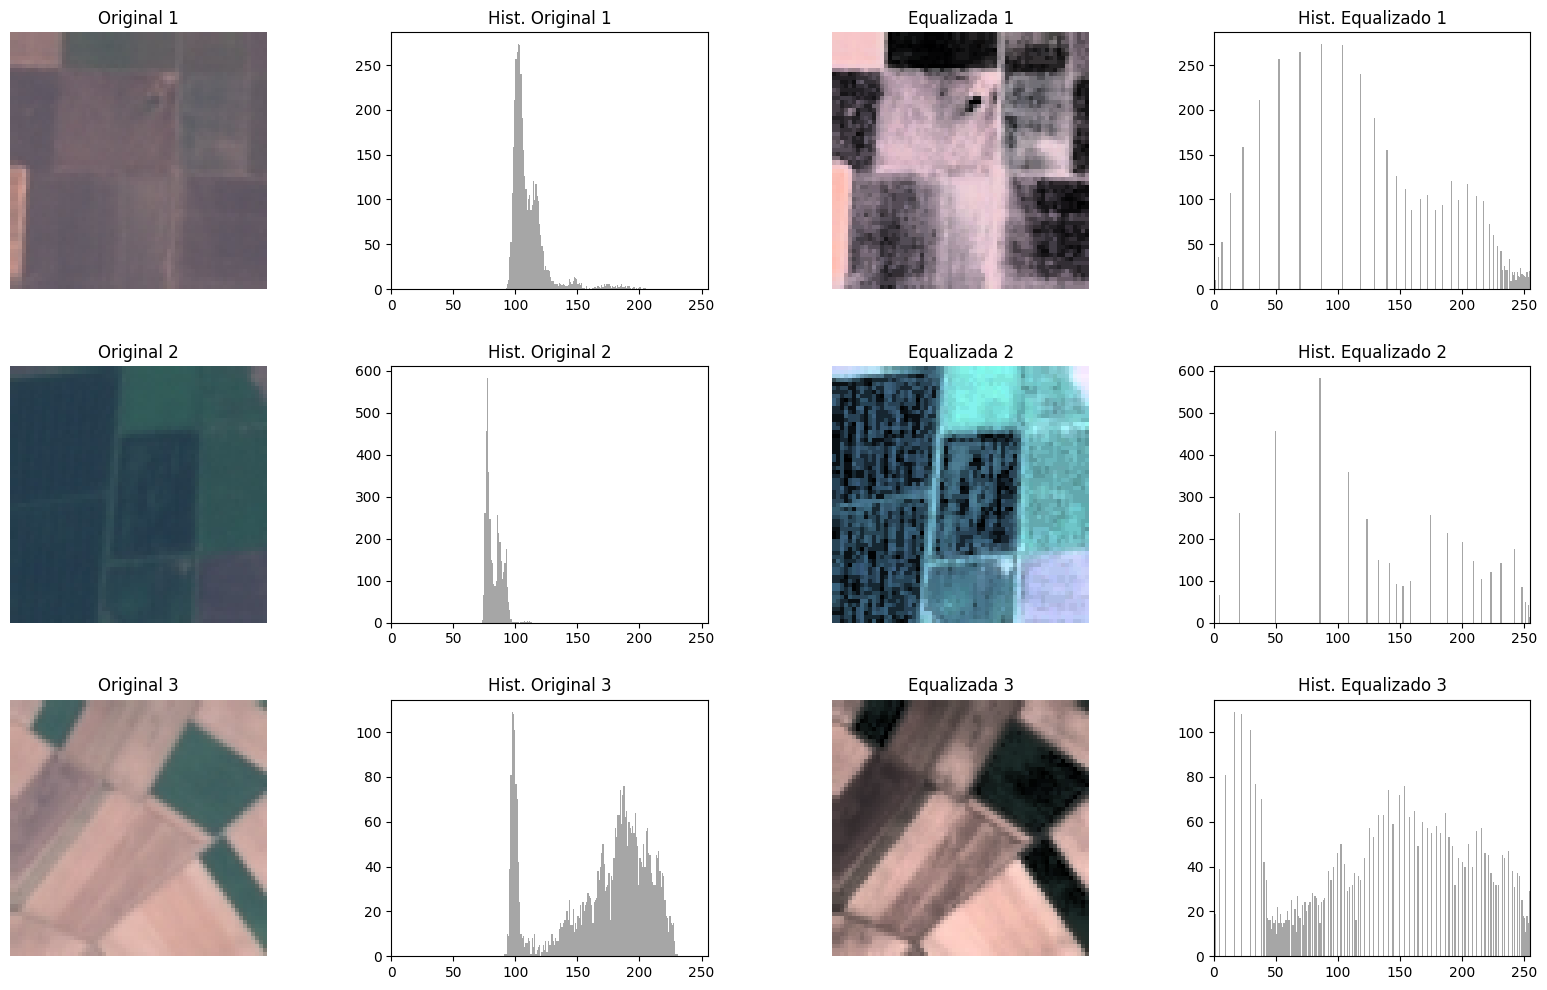

In [29]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Função para plotar histograma do canal V
def plot_histogram(v_channel, ax, title):
    ax.hist(v_channel.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    ax.set_title(title)
    ax.set_xlim(0, 255)

# Processamento para cada imagem
for i in range(3):
    # --- Imagem Original ---
    # Converte BGR para RGB e HSV
    original_bgr = locals()[f'img{i+1}']
    original_rgb = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB)
    hsv_original = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2HSV)
    v_original = hsv_original[:, :, 2]

    # Exibe imagem original
    axs[i, 0].imshow(original_rgb)
    axs[i, 0].set_title(f'Original {i+1}')
    axs[i, 0].axis('off')

    # Histograma original
    plot_histogram(v_original, axs[i, 1], f'Hist. Original {i+1}')

    # --- Imagem Equalizada ---
    # Canal V equalizado (já está em hsv_img1, hsv_img2, hsv_img3)
    v_equalized = locals()[f'hsv_img{i+1}'][:, :, 2]
    equalized_rgb = locals()[f'img{i+1}_equalized']

    # Exibe imagem equalizada
    axs[i, 2].imshow(equalized_rgb)
    axs[i, 2].set_title(f'Equalizada {i+1}')
    axs[i, 2].axis('off')

    # Histograma equalizado
    plot_histogram(v_equalized, axs[i, 3], f'Hist. Equalizado {i+1}')

plt.show()